# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()
# df['income_binary'].unique()
# df['income_binary'].value_counts()
# list[df.columns]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

**Markdown Cell**
1. I will be using the adultDataSet
2. I will be predicting the binary income of an individual. The label is `income_binary`
3. This a supervised learning problem. It is a binary classification problem. The classes are '<=50K' and '>50K' 
4. My current list of features: 'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'
5. This is an important problem, as it can be applied to multiple situations. Predicting one's income can help the government identify individuals for aid such as FASFA, or potentially higher forms of aid if this individual is living alone and stuggling to pay for rent or food. A prediction model can also point out societal issues in which individuals of a certain race or gender are more likely to be struggling while others working a similar job or position are less likely to be struggling

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
print(df.describe())
print("-----")
print(df.dtypes)
print("-----")
print(df.isna().sum())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32399.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.589216  1.897784e+05      10.080679    615.907773     87.303830   
std       13.647862  1.055500e+05       2.572720   2420.191974    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  14084.000000   4356.000000   

       hours-per-week  
count    32236.000000  
mean        40.450428  
std         12.353748  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
-----
age               float64
workclass          object
fnlwg

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

**Markdown Cell**
* My feature list will consist of all the features from my data frame that are integer or float values to train my linear regression model
* I will prepare my data by filling in null number values with their mean. I will then one hot encode string values with a limited amount of unique values.
* My model is a linear regression model that produces a binary classification on an individual's income
* I plan on training my model and testing it as we did in our past labs by using the train_test_split method to split my data frame and view its performance. I will then validate my model using log loss and accuracy plots, as well as a grid search to ensure my model uses the best parameters possible. I will view the accuracy scores of my model on my testing data

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Step 1: Cleaning the Data
(referenced from Lab 2)

In [5]:
nan_count = df.isna().sum()
nan_detected = df.isna().any()

is_int_or_float = df.dtypes.apply(lambda dt: dt == 'int64' or dt == 'float64')
to_impute = nan_detected & is_int_or_float

to_impute

age                True
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex_selfID        False
capital-gain      False
capital-loss      False
hours-per-week     True
native-country    False
income_binary     False
dtype: bool

In [6]:
to_impute_selected = ["age", "hours-per-week"]

for col in to_impute_selected:
     df[f"{col}_na"] = df[col].isna()

for col in to_impute_selected:
    df[col].fillna(df[col].mean(), inplace=True)

for colname in df.columns.tolist():
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

age missing values count :0
workclass missing values count :1836
fnlwgt missing values count :0
education missing values count :0
education-num missing values count :0
marital-status missing values count :0
occupation missing values count :1843
relationship missing values count :0
race missing values count :0
sex_selfID missing values count :0
capital-gain missing values count :0
capital-loss missing values count :0
hours-per-week missing values count :0
native-country missing values count :583
income_binary missing values count :0
age_na missing values count :0
hours-per-week_na missing values count :0


In [7]:
null_str_cols = ['workclass', 'occupation', 'native-country']

for col in null_str_cols:
    df[col].fillna('unavailable', inplace=True)

for colname in df.columns.tolist():
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

age missing values count :0
workclass missing values count :0
fnlwgt missing values count :0
education missing values count :0
education-num missing values count :0
marital-status missing values count :0
occupation missing values count :0
relationship missing values count :0
race missing values count :0
sex_selfID missing values count :0
capital-gain missing values count :0
capital-loss missing values count :0
hours-per-week missing values count :0
native-country missing values count :0
income_binary missing values count :0
age_na missing values count :0
hours-per-week_na missing values count :0


### Step 2: One Hot Encoding the Data
(referenced Lab 2)

In [8]:
df.select_dtypes(include='object').nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex_selfID         2
native-country    42
income_binary      2
dtype: int64

In [9]:
one_hot_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID']
for col in one_hot_cols:
    print(col, df[col].unique())
    col_dummies = pd.get_dummies(df[col], prefix=col)
    df = df.drop(col, axis=1)
    df = pd.concat([df, col_dummies], axis=1)
    print(list(col_dummies.columns))
    print()

workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'unavailable' 'Self-emp-inc' 'Without-pay' 'Never-worked']
['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'workclass_unavailable']

education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college']

marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-

### Step 3: Train Linear Regression Model
(referenced Lab 4)

Define X and y

In [10]:
feature_list = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
X = df[feature_list]
y = df['income_binary']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21815, 6) (10746, 6) (21815,) (10746,)


Scalar to avoid exceeding max iterations (makes for better training)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Function definition for training and showing results on my Linear Regression model

In [13]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    probability_predictions = model.predict_proba(X_test)
    
    df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
    print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))
    
    l_loss = log_loss(y_test, probability_predictions)
    print('Log loss: ' + str(l_loss))
    
    class_label_predictions = model.predict(X_test)
    print('Class labels: ' + str(class_label_predictions[0:5]))
    
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    print('Accuracy: ' + str(acc_score))
    
    return l_loss, acc_score

In [14]:
print(train_test_LR(X_train, y_train, X_test, y_test))

Class Prediction Probabilities: 
 Class: False  Class: True
     0.760618     0.239382
     0.639709     0.360291
     0.927886     0.072114
     0.321992     0.678008
     0.763593     0.236407
Log loss: 0.400685855360365
Class labels: ['<=50K' '<=50K' '<=50K' '>50K' '<=50K']
Accuracy: 0.8164898566908617
(0.400685855360365, 0.8164898566908617)


### Step 4: Evaluate and Optomize Model
(referenced Lab 4)

In [15]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

In [16]:
c_acc_scores = []
c_l_loss = []
for c in cs:
    loss, acc = train_test_LR(X_train, y_train, X_test, y_test, c)
    c_l_loss.append(loss)
    c_acc_scores.append(acc)

Class Prediction Probabilities: 
 Class: False  Class: True
     0.759477     0.240523
     0.759477     0.240523
     0.759477     0.240523
     0.759477     0.240523
     0.759477     0.240523
Log loss: 0.5526812395115575
Class labels: ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K']
Accuracy: 0.758607854085241
Class Prediction Probabilities: 
 Class: False  Class: True
     0.759477     0.240523
     0.759477     0.240523
     0.759478     0.240522
     0.759476     0.240524
     0.759477     0.240523
Log loss: 0.552679907859819
Class labels: ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K']
Accuracy: 0.758607854085241
Class Prediction Probabilities: 
 Class: False  Class: True
     0.759476     0.240524
     0.759471     0.240529
     0.759484     0.240516
     0.759462     0.240538
     0.759475     0.240525
Log loss: 0.5526665985329406
Class labels: ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K']
Accuracy: 0.758607854085241
Class Prediction Probabilities: 
 Class: False  Class: True
     0.759467    

In [17]:
cs_log10 = np.log10(cs)

print(cs)
print(cs_log10)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]


**Log Loss Plot**

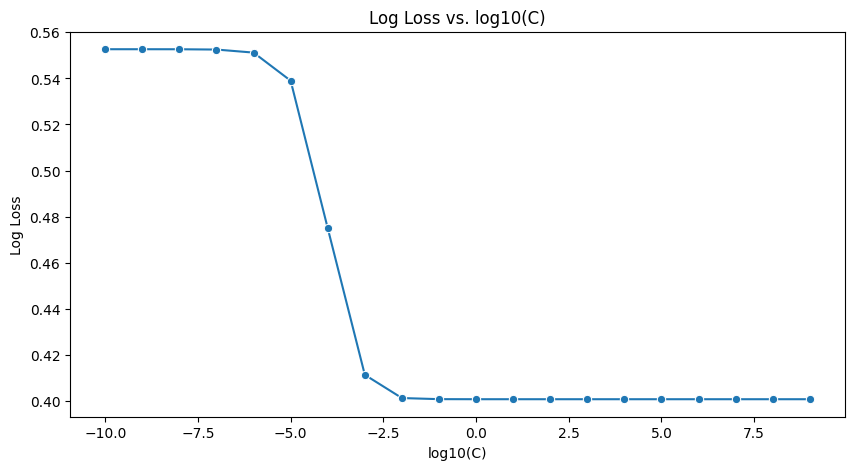

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=cs_log10, y=c_l_loss, marker='o')

plt.xlabel('log10(C)')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. log10(C)')
plt.show()

**Accuracy Plot**

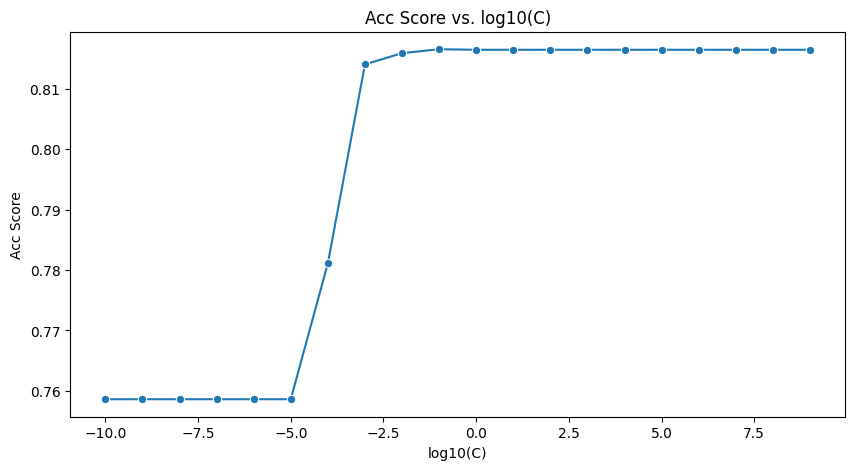

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=cs_log10, y=c_acc_scores, marker='o')

plt.xlabel('log10(C)')
plt.ylabel('Acc Score')
plt.title('Acc Score vs. log10(C)')
plt.show()

**Grid Search to Confirm Best Params**

In [20]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best C value:", grid_search.best_params_['C'])
print("Best cross-validated accuracy:", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)

Best C value: 10
Best cross-validated accuracy: 0.8147146458858584


### Results

My model has an accuracy rate just above 80%. While not perfect, this model is very successful. My grid search shows C=10 as being the best parameters; my log loss and accuracy plots prove this to be true, where any c value greater than -2 performing well with little improvements as c increases. If my model was performing better, I would look into removing features, but there aren't a surplus of features that would drive up execution costs, so they can remain.